# **A Logistic Regression in Python**

**Logistic Regression** is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of X.

**Logistic Regression Assumptions**
- *Binary logistic regression requires the dependent variable to be binary.*
- *For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome.*
- *Only the meaningful variables should be included.*
- *The independent variables should be independent of each other. That is, the model should have little or no multicollinearity.*
- *The independent variables are linearly related to the log odds.*
- *Logistic regression requires quite large sample sizes.* 

Keeping the above assumptions in mind, let’s look at our dataset.

**Data**
The dataset is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict whether the client will subscribe (1/0) to a term deposit (variable y).

**Input variables**

1. age (numeric)
2. job : type of job (categorical: “admin”, “blue-collar”, “entrepreneur”, “housemaid”, “management”, “retired”, “self-employed”, “services”, “student”, “technician”, “unemployed”, “unknown”)
3. marital : marital status (categorical: “divorced”, “married”, “single”, “unknown”)
4. education (categorical: “basic.4y”, “basic.6y”, “basic.9y”, “high.school”, “illiterate”, “professional.course”, “university.degree”, “unknown”)
5. default: has credit in default? (categorical: “no”, “yes”, “unknown”)
6. housing: has housing loan? (categorical: “no”, “yes”, “unknown”)
7. loan: has personal loan? (categorical: “no”, “yes”, “unknown”)
8. contact: contact communication type (categorical: “cellular”, “telephone”)
9. month: last contact month of year (categorical: “jan”, “feb”, “mar”, …, “nov”, “dec”)
10. day_of_week: last contact day of the week (categorical: “mon”, “tue”, “wed”, “thu”, “fri”)
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y=’no’). The duration is not known before a call is performed, also, after the end of the call, y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: “failure”, “nonexistent”, “success”)
16. emp.var.rate: employment variation rate — (numeric)
17. cons.price.idx: consumer price index — (numeric)
18. cons.conf.idx: consumer confidence index — (numeric)
19. euribor3m: euribor 3 month rate — (numeric)
20. nr.employed: number of employees — (numeric)

In [ ]:
#Agenda
    #implementation of Logistic Regression Model
    #EDA
    #Feature Selection  
    #Model building
    #Accuracy

In [ ]:
#EDA
    #exploratory data analysis
        #missing value analysis
        #outlier analysis

In [ ]:
#importing data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('bank-additional.csv', sep = ';')
data2 = pd.read_csv('bank-additional.csv', sep = ';')

In [ ]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
data.job.value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1726
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [ ]:
#name of function which provdies description about the data
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41195.000000,41196.000000,41196.000000,41196.000000,41196.000000,41196.000000,41195.000000,41196.000000,41196.000000,41196.000000
mean,40.030319,258.281265,2.567676,962.482547,0.173124,0.081656,93.575867,-40.504600,3.620787,5166.996405
std,10.431818,259.254211,2.769751,186.893451,0.494987,1.570894,0.578999,4.629972,1.734655,72.300104
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
#fun which provides row and column numbers
data.shape

(41199, 21)

In [ ]:
#fun name for checking data types
data.dtypes

age               float64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration          float64
campaign          float64
pdays             float64
previous          float64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [ ]:
#changing data types
data['y'] = np.where(data['y'] == 'yes',1,0)
data['y'] = data['y'].astype(str)

In [ ]:
data2['y'] = np.where(data2['y'] == 'yes',1,0)
data2['y'] = data['y'].astype(str)
data2.y.value_counts()

0    36559
1     4640
Name: y, dtype: int64

In [ ]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [ ]:
#Missing values analysis
data.isnull().sum()

age               4
job               5
marital           5
education         5
default           4
housing           3
loan              4
contact           4
month             3
day_of_week       3
duration          3
campaign          3
pdays             3
previous          3
poutcome          5
emp.var.rate      3
cons.price.idx    4
cons.conf.idx     3
euribor3m         3
nr.employed       3
y                 0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41199 entries, 0 to 41198
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41195 non-null  float64
 1   job             41194 non-null  object 
 2   marital         41194 non-null  object 
 3   education       41194 non-null  object 
 4   default         41195 non-null  object 
 5   housing         41196 non-null  object 
 6   loan            41195 non-null  object 
 7   contact         41195 non-null  object 
 8   month           41196 non-null  object 
 9   day_of_week     41196 non-null  object 
 10  duration        41196 non-null  float64
 11  campaign        41196 non-null  float64
 12  pdays           41196 non-null  float64
 13  previous        41196 non-null  float64
 14  poutcome        41194 non-null  object 
 15  emp.var.rate    41196 non-null  float64
 16  cons.price.idx  41195 non-null  float64
 17  cons.conf.idx   41196 non-null 

In [ ]:
#list of columns of data
col_list = list(data.columns)

In [ ]:
col_list.remove('y')

In [ ]:
col_list

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [ ]:
#Replacing missing values in dataset
    #if datatype == object :
        #mode
    #else 
        #mean

In [ ]:
#access mode of a column
data['job'].mode()[0]

'admin.'

In [ ]:
#access mean of a column
data['duration'].mean()

258.2812651713759

In [ ]:
#Replacing values in dataset
for col_name in col_list:
    if data[col_name].dtypes=='object':
        data[col_name] = data[col_name].fillna(data[col_name].mode()[0])
    else:
        data[col_name] = data[col_name].fillna(data[col_name].mean())

In [ ]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [ ]:
#outlier analysis
    #outliers detection
    #outlier removal

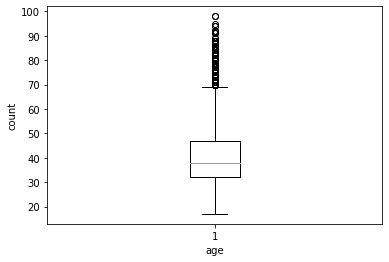

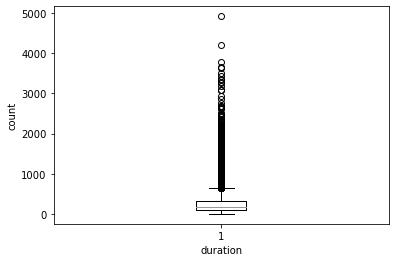

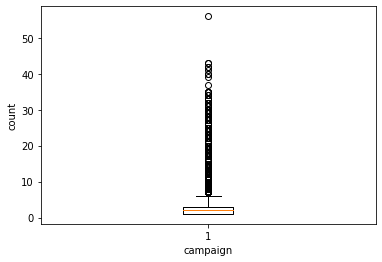

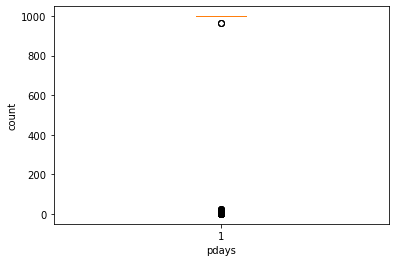

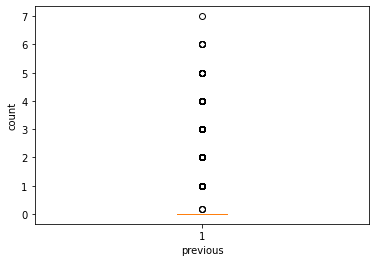

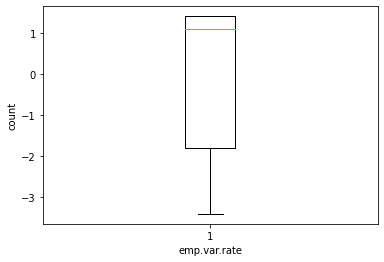

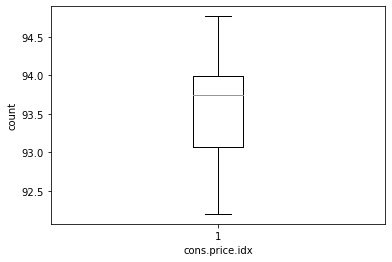

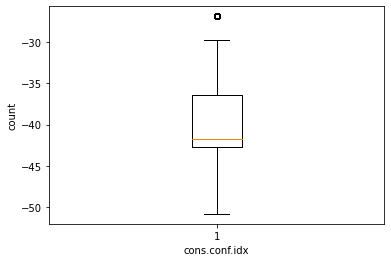

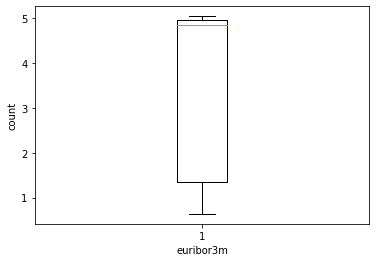

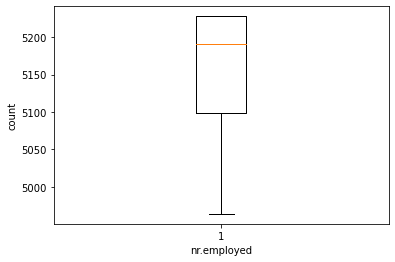

In [ ]:
#outlier detection 
for i in col_list:
    if(data[i].dtype == 'int64' or data[i].dtype == 'float64'):
        plt.boxplot(data[i])
        plt.xlabel(i)
        plt.ylabel('count')
        plt.show()

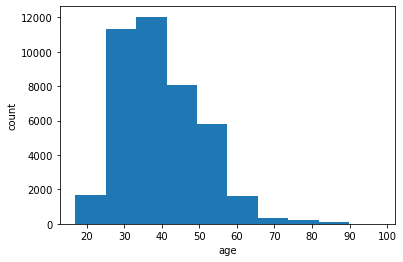

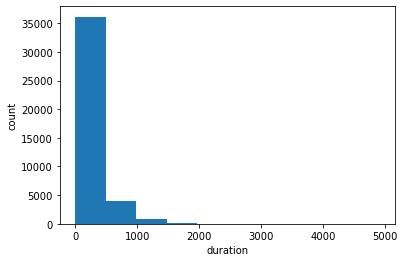

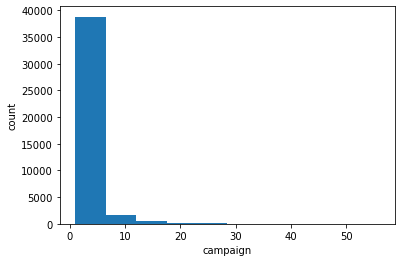

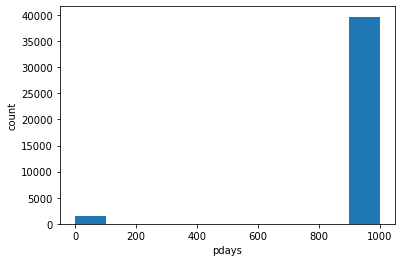

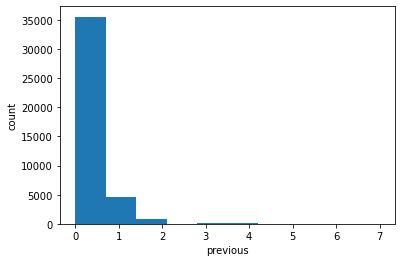

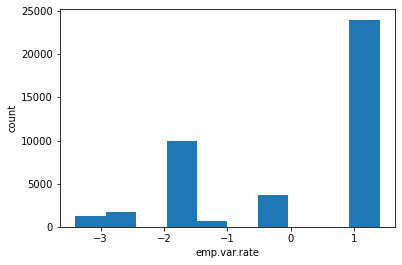

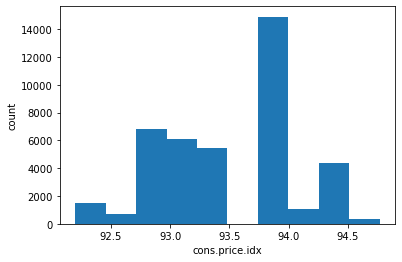

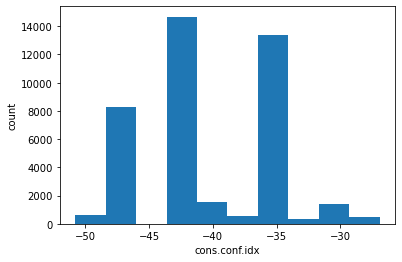

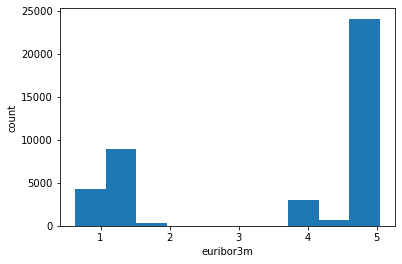

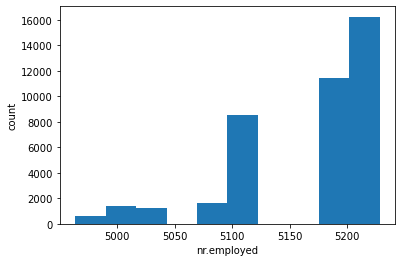

In [ ]:
for i in col_list:
    if(data[i].dtype == 'int64' or data[i].dtype == 'float64'):
        plt.hist(data[i])
        plt.xlabel(i)
        plt.ylabel('count')
        plt.show()

In [ ]:
#outlier removal
    #IQR
    #mean

In [ ]:
#Mean
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41199.000000,41199.000000,41199.000000,41199.000000,41199.000000,41199.000000,41199.000000,41199.000000,41199.000000,41199.000000
mean,40.030319,258.281265,2.567676,962.482547,0.173124,0.081656,93.575867,-40.504600,3.620787,5166.996405
std,10.431311,259.244772,2.769650,186.886646,0.494969,1.570836,0.578971,4.629804,1.734592,72.297472
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
#Mean criteria
print('Highest Allowed',data['age'].mean() + 5*data['age'].std())
print('Lowest Allowed',data['age'].mean() - 3*data['age'].std())

Highest Allowed 92.18687473494765
Lowest Allowed 8.736385900626246


In [ ]:
#IQR criteria
#Q1 - 1.5*IQR
#Q3 + 1.5*IQR
data[col_name] 

0        5191.000000
1        5191.000000
2        5191.000000
3        5191.000000
4        5191.000000
            ...     
41194    4963.600000
41195    4963.600000
41196    4963.600000
41197    5166.996405
41198    4963.600000
Name: nr.employed, Length: 41199, dtype: float64

In [ ]:
#outlier removal
#IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age                15.000
duration          217.000
campaign            2.000
pdays               0.000
previous            0.000
emp.var.rate        3.200
cons.price.idx      0.919
cons.conf.idx       6.300
euribor3m           3.617
nr.employed       129.000
dtype: float64


In [ ]:
data  = data[~((data < (Q1 - 1.5*IQR)) | (data > (Q3 + 1.5*IQR))).any(axis = 1)]

<ipython-input-31-5520944b49c6>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data  = data[~((data < (Q1 - 1.5*IQR)) | (data > (Q3 + 1.5*IQR))).any(axis = 1)]
<ipython-input-31-5520944b49c6>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data  = data[~((data < (Q1 - 1.5*IQR)) | (data > (Q3 + 1.5*IQR))).any(axis = 1)]


In [ ]:
data.shape

(30360, 21)

In [ ]:
query = data['age'] > 50
data[query]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
6,59.0,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
13,57.0,housemaid,divorced,basic.4y,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41138,58.0,unemployed,married,university.degree,no,yes,no,cellular,nov,thu,...,2.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.041,4963.6,1
41169,62.0,services,married,high.school,no,yes,no,cellular,nov,wed,...,5.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.030,4963.6,0
41177,57.0,retired,married,professional.course,no,yes,no,cellular,nov,thu,...,6.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.031,4963.6,0
41179,64.0,retired,divorced,professional.course,no,yes,no,cellular,nov,fri,...,3.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0


In [ ]:
#Binning
    #process of converting the continuous column to categorical column
bins  = [0,1,5,10,25,50,100]
data['age'] = pd.cut(data['age'],bins)
data['age'] = data.age.astype(str)

In [ ]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,"(50, 100]",housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,"(50, 100]",services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,"(25, 50]",services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,"(25, 50]",admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,"(50, 100]",services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [ ]:
data['age'].unique()

array(['(50, 100]', '(25, 50]', '(10, 25]'], dtype=object)

In [ ]:
data.age.value_counts()

(25, 50]     24302
(50, 100]     4949
(10, 25]      1109
Name: age, dtype: int64

In [ ]:
data2 = data

In [ ]:
#Feature Selection
#Model Building
#Accuracy

In [ ]:
#Feature Selection
    #encoding
    #VIF

In [ ]:
#Encoding
    #conveting object type into numerical type
    #LabelEnconding

In [ ]:
#enconding requires indepenent object format data
col_list = []
for i in data.columns:
    if((data[i].dtype == 'object') & (i != 'y')):
        col_list.append(i)        

In [ ]:
col_list

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [ ]:
#LabelEncoding
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for i in col_list:
    data[i] = labelencoder.fit_transform(data[i])

In [ ]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,2,3,1,0,0,0,0,1,6,1,...,1.0,999.0,0.0,0,1.1,93.994,-36.4,4.857,5191.0,0
1,2,7,1,3,1,0,0,1,6,1,...,1.0,999.0,0.0,0,1.1,93.994,-36.4,4.857,5191.0,0
2,1,7,1,3,0,2,0,1,6,1,...,1.0,999.0,0.0,0,1.1,93.994,-36.4,4.857,5191.0,0
3,1,0,1,1,0,0,0,1,6,1,...,1.0,999.0,0.0,0,1.1,93.994,-36.4,4.857,5191.0,0
4,2,7,1,3,0,0,2,1,6,1,...,1.0,999.0,0.0,0,1.1,93.994,-36.4,4.857,5191.0,0


In [ ]:
#VIF

In [ ]:
data.age.value_counts() 

1    24302
2     4949
0     1109
Name: age, dtype: int64

In [ ]:
#VIF

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
col_list = []
for i in data.columns:
    if((data[i].dtype != 'object')&(i != 'y')):
        col_list.append(i)

In [ ]:
col_list

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [ ]:
x = data[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,feature,VIF
0,age,1.099807
1,job,1.025365
2,marital,1.095777
3,education,1.099320
4,default,1.091979
5,housing,1.013153
6,loan,1.003026
7,contact,2.719023
8,month,2.059462
9,day_of_week,1.010873


In [ ]:
data = data.drop(['pdays'],axis = 1)

In [ ]:
col_list = []
for i in data.columns:
    if((data[i].dtype != 'object')&(i != 'y')):
        col_list.append(i)
        
x = data[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,feature,VIF
0,age,8.703249
1,job,2.095210
2,marital,5.200432
3,education,4.460453
4,default,1.410682
5,housing,2.192741
6,loan,1.208273
7,contact,3.589441
8,month,7.816661
9,day_of_week,3.106289


In [ ]:
data = data.drop(['nr.employed'],axis = 1)

In [ ]:
col_list = []
for i in data.columns:
    if((data[i].dtype != 'object')&(i != 'y')):
        col_list.append(i)
        
x = data[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,feature,VIF
0,age,8.703184
1,job,2.095170
2,marital,5.199740
3,education,4.460449
4,default,1.409515
5,housing,2.192125
6,loan,1.208172
7,contact,2.749890
8,month,6.752041
9,day_of_week,3.105672


In [ ]:
data = data.drop(['cons.price.idx'],axis = 1)

In [ ]:
col_list = []
for i in data.columns:
    if((data[i].dtype != 'object')&(i != 'y')):
        col_list.append(i)
        
x = data[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,feature,VIF
0,age,8.404554
1,job,2.086249
2,marital,5.077423
3,education,4.387891
4,default,1.406885
5,housing,2.187296
6,loan,1.207540
7,contact,2.505175
8,month,6.414972
9,day_of_week,3.082770


In [ ]:
data = data.drop(['euribor3m'],axis = 1)

In [ ]:
col_list = []
for i in data.columns:
    if((data[i].dtype != 'object')&(i != 'y')):
        col_list.append(i)
        
x = data[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,feature,VIF
0,age,7.809775
1,job,2.075524
2,marital,4.973142
3,education,4.199148
4,default,1.406715
5,housing,2.176803
6,loan,1.207275
7,contact,2.495454
8,month,5.782796
9,day_of_week,3.034532


In [ ]:
data = data.drop(['cons.conf.idx'],axis = 1)

In [ ]:
col_list = []
for i in data.columns:
    if((data[i].dtype != 'object')&(i != 'y')):
        col_list.append(i)
        
x = data[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,feature,VIF
0,age,5.885356
1,job,2.048867
2,marital,4.109692
3,education,3.947833
4,default,1.396176
5,housing,2.109109
6,loan,1.202249
7,contact,2.482859
8,month,5.136100
9,day_of_week,2.893672


In [ ]:
data = data.drop(['previous','poutcome'],axis = 1)

In [ ]:
col_list = []
for i in data.columns:
    if((data[i].dtype != 'object')&(i != 'y')):
        col_list.append(i)
        
x = data[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,feature,VIF
0,age,5.885356
1,job,2.048867
2,marital,4.109692
3,education,3.947833
4,default,1.396176
5,housing,2.109109
6,loan,1.202249
7,contact,2.482859
8,month,5.136100
9,day_of_week,2.893672


In [ ]:
#Model Building

In [ ]:
x = pd.DataFrame(data[vif_data.feature])
y = data.y

In [ ]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8,random_state = 0)

In [ ]:
x_train.shape

(24288, 13)

In [ ]:
x_test.shape

(6072, 13)

In [ ]:
x_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,emp.var.rate
14109,1,2,1,6,1,0,0,0,3,1,97.0,2.0,1.4
14305,1,0,1,3,0,0,0,0,3,1,81.0,3.0,1.4
25648,1,0,1,6,0,2,0,0,7,4,94.0,1.0,-0.1
31748,1,1,1,0,0,2,2,0,6,2,195.0,1.0,-1.8
23467,1,9,1,5,1,2,0,0,1,4,145.0,2.0,1.4


In [ ]:
y.value_counts()

0    28705
1     1655
Name: y, dtype: int64

In [ ]:
#Model Fitting

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel  = LogisticRegression()

In [ ]:
logmodel.fit(x_train,y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
pred = logmodel.predict(x_test)

In [ ]:
#accuracy
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
accuracy_score(y_test,pred)

0.9430171277997365

In [ ]:
confusion_matrix(y_test,pred)

array([[5679,   71],
       [ 275,   47]], dtype=int64)

In [ ]:
(5679+275)/(5679+71+275+47)

0.980566534914361

#1,0,1,0,0,1,1,1,0,1 : predicted
#0,1,0,1,1,0,1,1,0,1 : result
[1 2]
[3 4]
1 : +1 if pred -> 0 , result  -> 0
2 : +1 if pred -> 0 , result  -> 1
3 : +1 if pred -> 1 , result  -> 0
4 : +1 if pred -> 1 , result  -> 1
[1 3]
[3 3]

(1 + 4) / (1+2+3+4)